# Análisis de sentimientos de tweets en español

Este análisis de sentimiento r involucra una serie de pasos meticulosos para procesar y analizar datos de texto con el objetivo de identificar la polaridad de las opiniones expresadas en comentarios sobre dispositivos móviles. Se montó un drive para acceder a los datos, se cargaron y exploraron usando pandas, y se realizó una limpieza preliminar de los datos. Se emplearon técnicas de procesamiento de lenguaje natural (NLP) como la eliminación de palabras de parada y la creación de nubes de palabras para visualizar los términos más frecuentes en comentarios positivos y negativos.

Posteriormente, se aplicaron métodos de clasificación, incluyendo regresión logística y bosques aleatorios, para modelar y predecir la sentimentabilidad de nuevos comentarios. Se utilizó la vectorización de texto para transformar los datos de texto en un formato que los modelos de machine learning pueden procesar.

Los resultados del análisis se evaluaron utilizando matrices de confusión y reportes de clasificación para medir la precisión, recall y puntuación F1 de los modelos, con los siguientes resultados: una precisión de 0.67 para la clase negativa y 0.82 para la positiva, un recall de 0.73 para la negativa y 0.77 para la positiva, y una puntuación F1 de 0.70 para la negativa y 0.80 para la positiva. La precisión global del modelo fue del 74%, con una media de precisión, recall y puntuación F1 de 0.75, indicando un rendimiento relativamente bueno del modelo en la clasificación de los sentimientos de los comentarios.

Este análisis proporciona insights valiosos sobre las percepciones y opiniones de los usuarios respecto a los productos móviles, permitiendo identificar tendencias de sentimiento que pueden ser útiles para la toma de decisiones en marketing y desarrollo de producto.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_json('/content/drive/MyDrive/UCamp/M6/cellphones_train (1).json',lines=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categories  5326 non-null   object
 1   id          5326 non-null   object
 2   klass       5326 non-null   object
 3   location    5326 non-null   object
 4   text        5326 non-null   object
 5   type        5326 non-null   object
 6   user        5326 non-null   object
dtypes: object(7)
memory usage: 291.4+ KB


In [ ]:
df.head()

,categories,id,klass,location,text,type,user
0,"[ ""DEVICE"" ]",12365b7939c255285dd57c6da16f9753,positive,Monterrey,@gnivricuevas esta bien cuando ella tenga un i...,Iphone,user_14404
1,"[ ""DEVICE"" ]",0a2677dfc29f1d7ab1db581ac1bd0533,neutral,"Puerto de Veracruz, México",RT @MarihuanaMexico: Me cae mal la gente que p...,Iphone,user_18729
2,"[ ""DEVICE"" ]",e91eea57ee10d536118618a24e1556cb,neutral,Mex D.F. Chihuahua Rules,RT @OMARCHAPARRO: De esas veces que tu vieja s...,Iphone,user_14179
3,"[ ""MOBILE"" ]",c6a37a4e3ad0c4fc16cd06b088b56a2f,neutral,GDL JAL,“@kurt_art: La Mera Fiesta en la Oficina con e...,Celular,user_2385
4,"[ ""MOBILE"" ]",4229240dc7a9dd795c814756e7ba6ef4,neutral,Puebla,les avisoooo no tengo celular nuevamente,Celular,user_15745


In [ ]:
df['klass'].unique()

array(['positive', 'neutral', 'negative', 'information'], dtype=object)

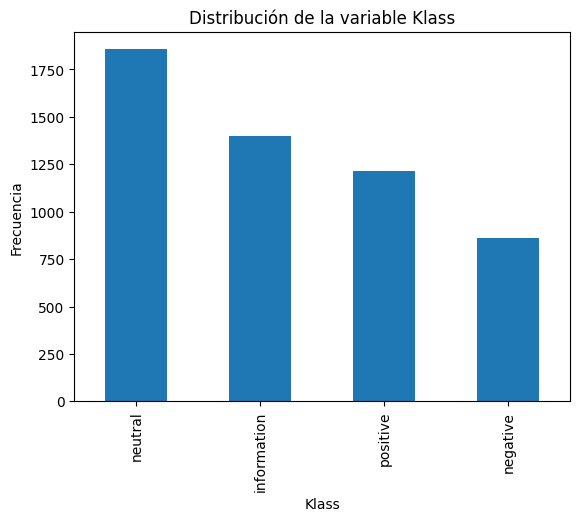

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
class_counts = df['klass'].value_counts()
class_counts.plot(kind='bar')
plt.title('Distribución de la variable Klass')
plt.xlabel('Klass')
plt.ylabel('Frecuencia')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


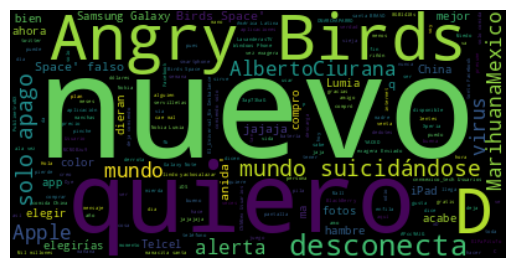

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud


# Creamos una lista de palabras de parada
stopwords = set(stopwords.words('spanish'))
stopwords.update(["br", "href", "product", "iPhone", "http", "Android", "celular", "RT", "si", "co", "foto", "t", "instagram", "gente", "4S"])
textt = " ".join(review for review in df.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
df = df[df['klass'].isin(['positive', 'negative'])]

In [ ]:
positive = df[df['klass'] == 'positive']
negative = df[df['klass'] == 'negative']

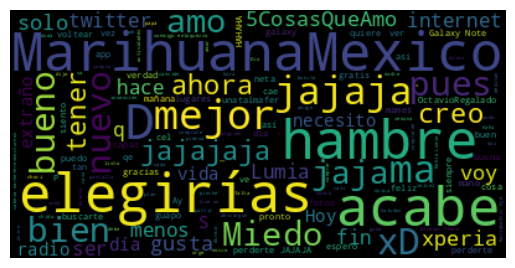

In [ ]:
# Nube de palabras de sentimientos positivos
stopwords = set(stopwords)
stopwords.update(["br", "href","good","great", "quiero", "mundo", "elegir", "dieran"])
## good y great son removidos porque son incluidos en sentimientos negativos también
pos = " ".join(review for review in positive.text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

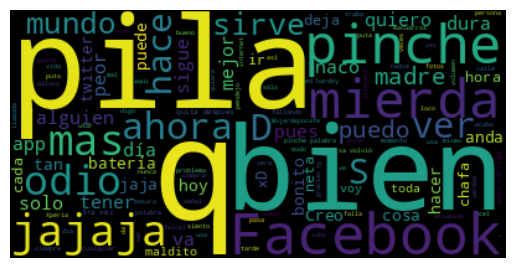

In [ ]:
# Nube de palabras de sentimientos negativos
neg = " ".join(str(review) for review in negative.text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [ ]:
df['sentiment'] = df['klass'].apply(lambda x: 1 if x == 'positive' else 0)
df.head()

,categories,id,klass,location,text,type,user,sentiment
0,"[ ""DEVICE"" ]",12365b7939c255285dd57c6da16f9753,positive,Monterrey,@gnivricuevas esta bien cuando ella tenga un i...,Iphone,user_14404,1
6,"[ ""DEVICE"" ]",9d13ca2bc32ca6b1f480b0a00903a885,negative,"Zapopan, Jalisco",No sé si me hace ver más gay mi maquillaje con...,Iphone,user_13947,0
7,"[ ""DEVICE"" ]",f445128a1cf228171313c50b20683002,positive,México D.F.,Comienzan a llamarme la atención el iPhone en ...,Iphone,user_15188,1
8,"[ ""DEVICE"" ]",760fdeba460cdff1f5bc6c4bff8e82ba,positive,"ÜT: 20.6013349,-100.4399955",El Xperia Arc S esta precioso un diseño elegan...,Xperia,user_13879,1
14,"[ ""MOBILE"" ]",c0d9a066668dcb49cdc073ecc46c9c73,negative,"Guadalajara, Jalisco",Mi celular esta caliente D: va explotar *lo av...,Celular,user_12513,0


In [ ]:
# Graficamos las reviews positivas y las negativas
import plotly.express as px

df['sentimentt'] = df['sentiment'].replace({0 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Sentimientos de mensajes de T')
fig.show()

In [ ]:
import pandas as pd
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['text'] = df['text'].apply(remove_punctuation)
df = df.dropna(subset=['text'])
df['text'] = df['text'].apply(remove_punctuation)
print(df.head())


      categories                                id     klass  \
0   [ "DEVICE" ]  12365b7939c255285dd57c6da16f9753  positive   
6   [ "DEVICE" ]  9d13ca2bc32ca6b1f480b0a00903a885  negative   
7   [ "DEVICE" ]  f445128a1cf228171313c50b20683002  positive   
8   [ "DEVICE" ]  760fdeba460cdff1f5bc6c4bff8e82ba  positive   
14  [ "MOBILE" ]  c0d9a066668dcb49cdc073ecc46c9c73  negative   

                       location  \
0                     Monterrey   
6              Zapopan, Jalisco   
7                   México D.F.   
8   ÜT: 20.6013349,-100.4399955   
14         Guadalajara, Jalisco   

                                                 text     type        user  \
0   gnivricuevas esta bien cuando ella tenga un ip...   Iphone  user_14404   
6   No sé si me hace ver más gay mi maquillaje con...   Iphone  user_13947   
7   Comienzan a llamarme la atención el iPhone en ...   Iphone  user_15188   
8   El Xperia Arc S esta precioso un diseño elegan...   Xperia  user_13879   
14  Mi celular

In [ ]:
dfNew = df[['text','sentiment']]
dfNew.head()

,text,sentiment
0,gnivricuevas esta bien cuando ella tenga un ip...,1
6,No sé si me hace ver más gay mi maquillaje con...,0
7,Comienzan a llamarme la atención el iPhone en ...,1
8,El Xperia Arc S esta precioso un diseño elegan...,1
14,Mi celular esta caliente D va explotar lo avienta,0


## Dividir el dataset

In [ ]:
import numpy as np

index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

## Bolsa de palabras

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['text'])
test_matrix = vectorizer.transform(test['text'])

In [ ]:
train_matrix

<1617x4129 sparse matrix of type '<class 'numpy.int64'>'
	with 20784 stored elements in Compressed Sparse Row format>

In [ ]:
test_matrix

<455x4129 sparse matrix of type '<class 'numpy.int64'>'
	with 4891 stored elements in Compressed Sparse Row format>

# Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = lr.predict(X_test)

print(X_test)

  (0, 498)	1
  (0, 855)	1
  (0, 1686)	1
  (0, 1763)	1
  (0, 2004)	1
  (0, 2365)	1
  (0, 2401)	1
  (0, 2447)	3
  (0, 2583)	1
  (0, 2650)	1
  (0, 2707)	1
  (0, 3351)	1
  (0, 3475)	1
  (0, 3619)	1
  (0, 3950)	1
  (1, 73)	1
  (1, 376)	1
  (1, 498)	1
  (1, 793)	1
  (1, 1291)	1
  (1, 1333)	1
  (1, 2004)	1
  (1, 2153)	1
  (1, 2268)	1
  (1, 3015)	1
  :	:
  (452, 4077)	2
  (453, 1090)	1
  (453, 1291)	1
  (453, 1602)	1
  (453, 1971)	1
  (453, 2252)	1
  (453, 2279)	1
  (453, 2564)	1
  (453, 2825)	2
  (453, 3082)	1
  (453, 3981)	1
  (453, 4077)	2
  (454, 275)	1
  (454, 496)	1
  (454, 1046)	1
  (454, 1090)	1
  (454, 1408)	1
  (454, 2268)	1
  (454, 2401)	1
  (454, 2711)	1
  (454, 3153)	1
  (454, 3199)	1
  (454, 3837)	1
  (454, 3851)	1
  (454, 3852)	1


# Pruebas

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
new = np.asarray(y_test)
cf_matrix = confusion_matrix(predictions,y_test)
cf_matrix

array([[128,  48],
       [ 63, 216]])

<Axes: >

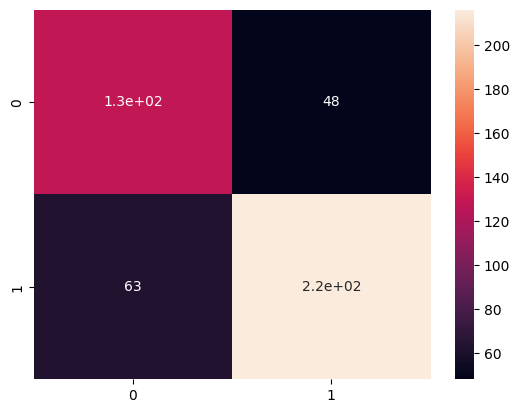

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       176
           1       0.82      0.77      0.80       279

    accuracy                           0.76       455
   macro avg       0.74      0.75      0.75       455
weighted avg       0.76      0.76      0.76       455



In [ ]:
review_test = "La pila es muy buena"

# Debemos hacer que nuestro texto de test pase por el mismo proceso que todo el dataset de train
review_convert = vectorizer.transform([review_test])
prediction_test = lr.predict(review_convert)
prediction_test

array([1])

# Random Forest

In [ ]:
import pandas as pd
df2 = pd.read_json('/content/drive/MyDrive/UCamp/M6/cellphones_train (1).json',lines=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categories  5326 non-null   object
 1   id          5326 non-null   object
 2   klass       5326 non-null   object
 3   location    5326 non-null   object
 4   text        5326 non-null   object
 5   type        5326 non-null   object
 6   user        5326 non-null   object
dtypes: object(7)
memory usage: 291.4+ KB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

In [ ]:
vectorizer = CountVectorizer(max_features=1000, stop_words=spanish_stopwords)
X_cv = vectorizer.fit_transform(df2['text'])

In [ ]:
y = df2['klass']
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 information       0.88      0.91      0.89       411
    negative       0.54      0.44      0.48       271
     neutral       0.66      0.65      0.66       557
    positive       0.58      0.66      0.62       359

    accuracy                           0.68      1598
   macro avg       0.67      0.66      0.66      1598
weighted avg       0.68      0.68      0.68      1598



In [ ]:
review_test = "Tiene poca memoria"

review_transformed = vectorizer.transform([review_test])
prediction_test = rf_model.predict(review_transformed)
print(prediction_test)

['positive']
